# Kr DD profiles

J. A Hernando, C. Herves

March 2022

In [1]:
%matplotlib inline 

#%matplotlib notebook
#matplotlib widget
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy             as np
import pandas            as pd
import tables            as tb
from   scipy             import stats

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

plt.rcParams['image.cmap'] = 'rainbow'

In [3]:
import hipy.utils        as ut
import hipy.pltext       as pltext
import hipy.profile      as prof

import nana.kr.krana     as krana

#import nana.bclouds.bclouds      as bc
#import hipy.hfit         as hfit

#import invisible_cities.io.dst_io as dio

In [4]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Wed May  4 16:49:48 2022


In [5]:
#import os
import re
import glob

from collections import namedtuple

## Code

## LT and shape 

In [6]:
df = krana.generate_kr_toy(100000, tau = 0.1, beta = 0.2, x0 = 0.05, y0 = -0.05)
df

,dtime,x,y,energy
0,0.056719,0.139402,-0.346797,34.210969
1,0.908284,0.353028,-0.071761,36.122305
2,0.126112,-0.137573,-0.185090,40.173970
3,0.901007,-0.158928,-0.409680,34.248253
4,0.775262,-0.183115,0.049450,38.908340
...,...,...,...,...
75546,0.095121,0.061836,0.014841,41.620980
75547,0.888426,-0.071575,0.029222,40.540363
75548,0.560025,0.063411,0.011050,41.155767
75549,0.605804,0.463610,0.094298,32.985007


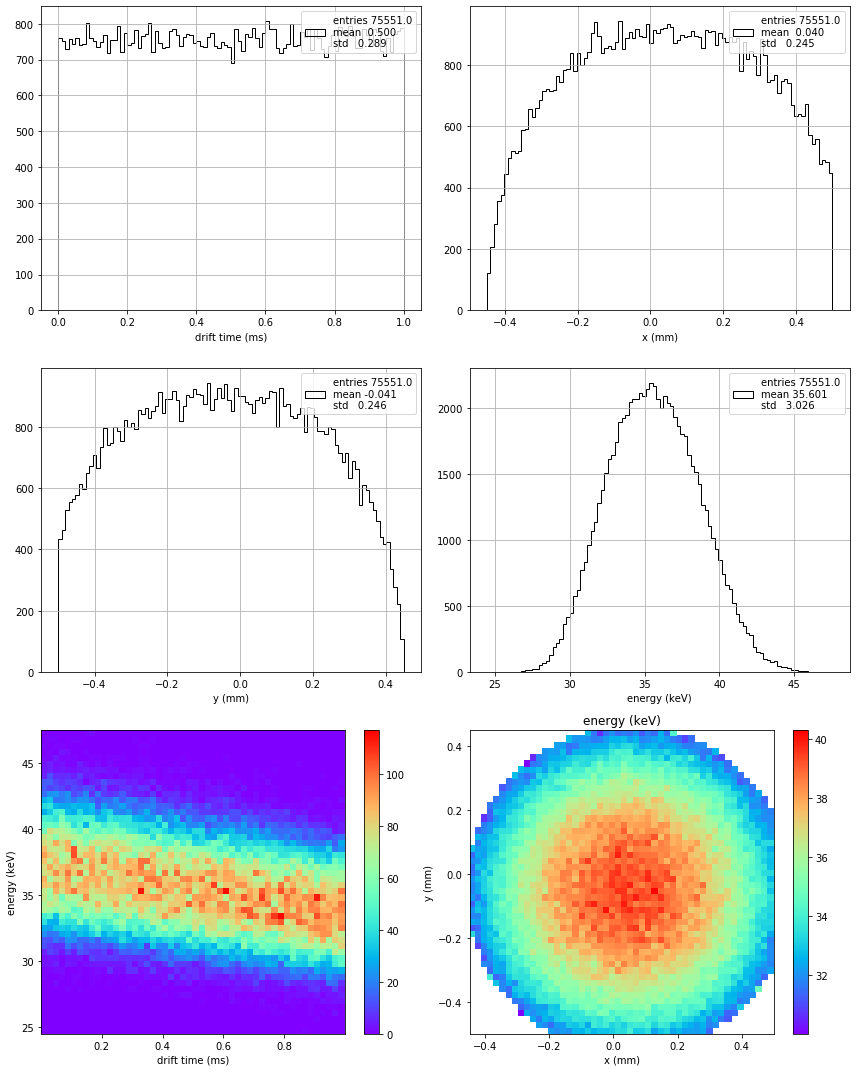

In [7]:
krana.plot_data(df, 50)

In [8]:
coors  = df.x, df.y
energy = df.energy
dtime  = df.dtime
counts_min = 10
grain  = 2
krmap  = krana.krmap(coors, dtime, energy, bins = (18 * grain, 18 * grain), counts_min = counts_min, dt0 = 0.)

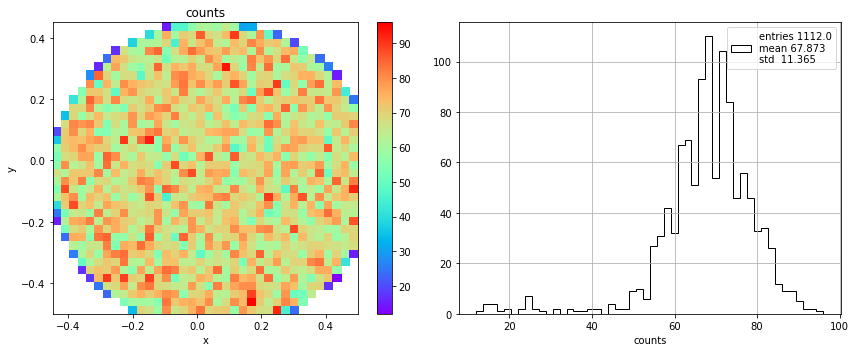

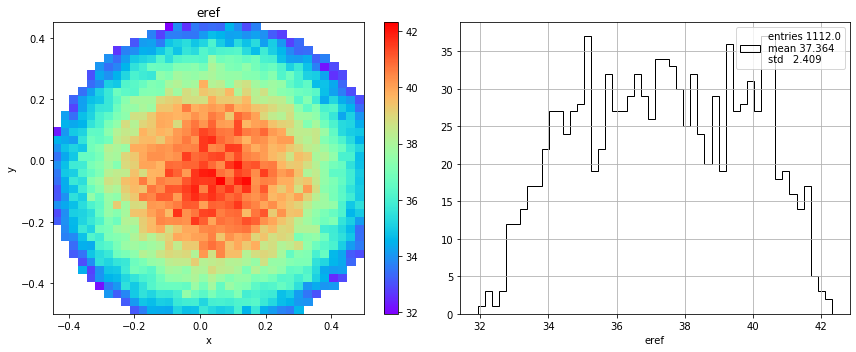

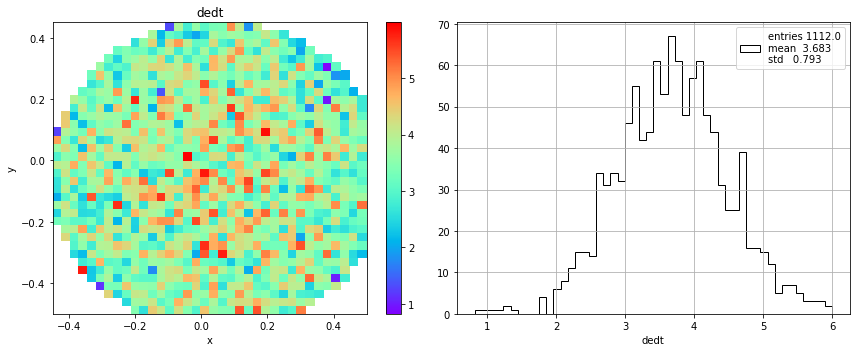

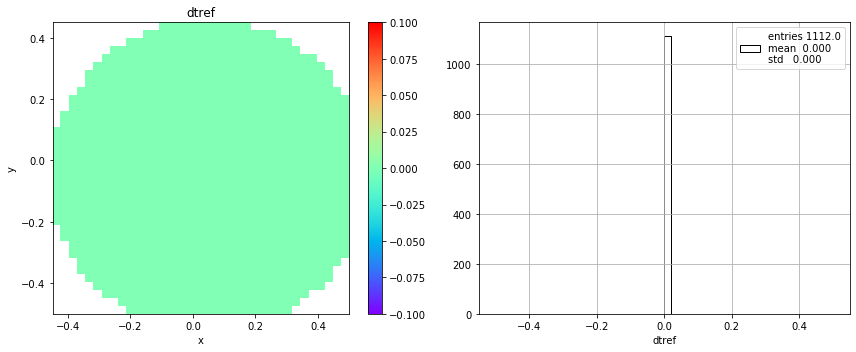

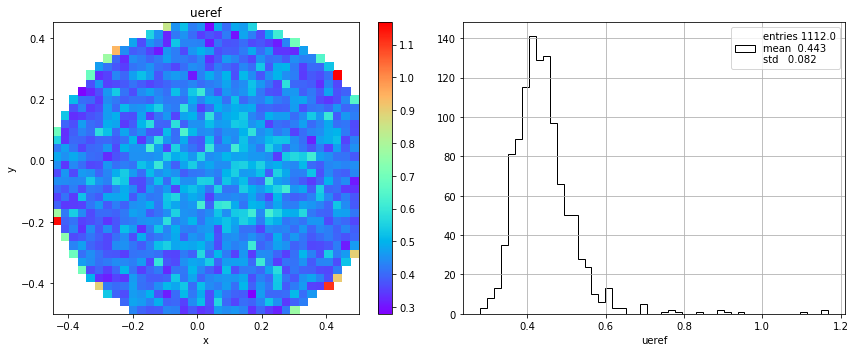

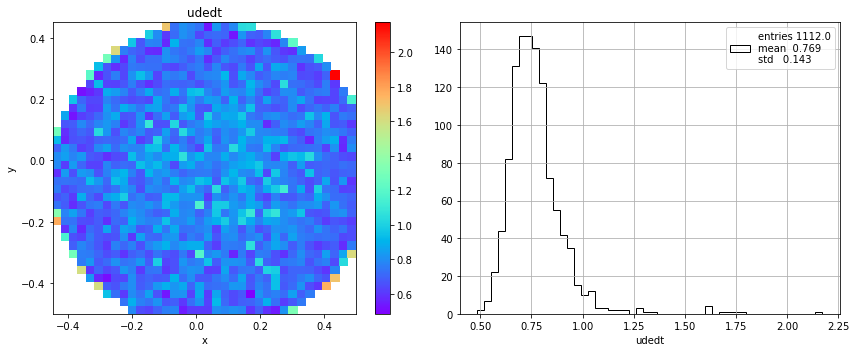

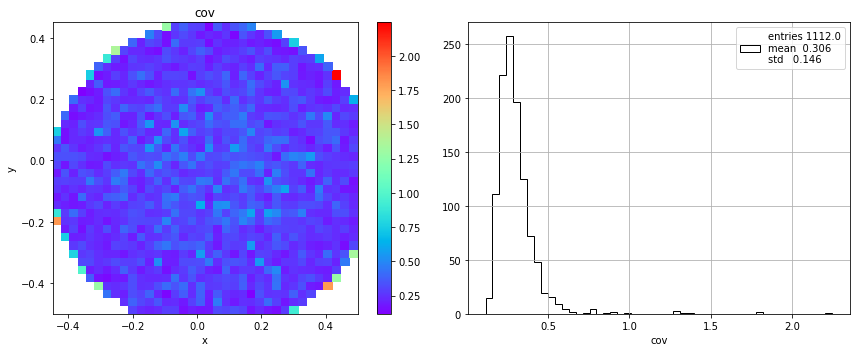

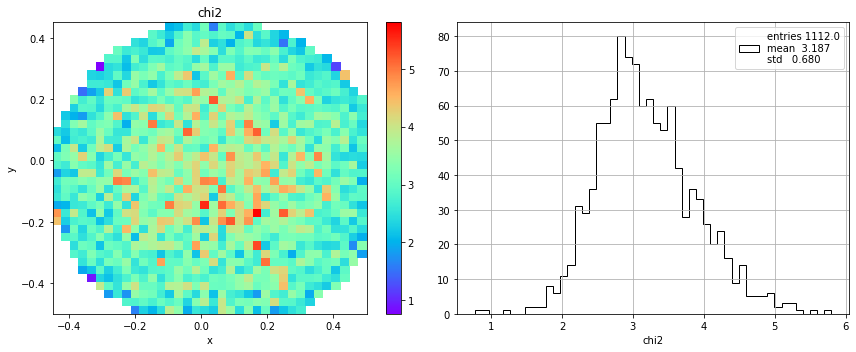

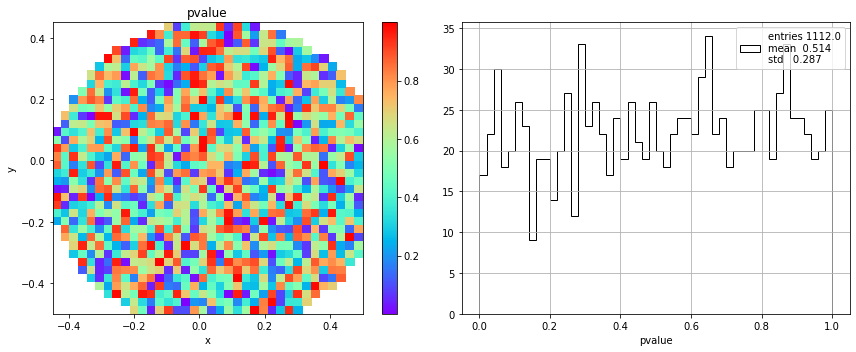

In [9]:
prof.plot_profile(krmap, stats = ('counts', 'eref', 'dedt', 'dtref', 'ueref', 'udedt', 'cov', 'chi2', 'pvalue'));

### correction

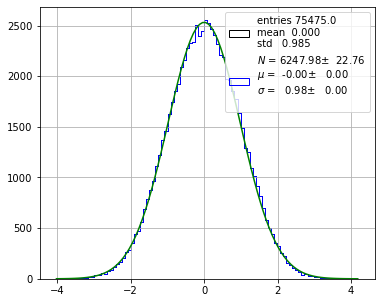

In [10]:
pltext.canvas(1, 1);
xsel = ~np.isnan(krmap.residuals)
pltext.hist(krmap.residuals[xsel], 100);
pltext.hfit(krmap.residuals[xsel], 100, fun = 'gaus');

In [11]:
corenergy, _ = krana.krmap_scale(coors, dtime, energy, krmap, scale = 41.5)

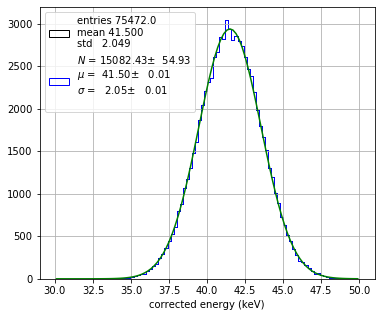

In [12]:
pltext.canvas(1, 1)
pltext.hist(corenergy, 100, (30., 50.));
pltext.hfit(corenergy, 100, fun = 'gaus', range = (30., 50.));
plt.xlabel('corrected energy (keV)');

### Validate correction

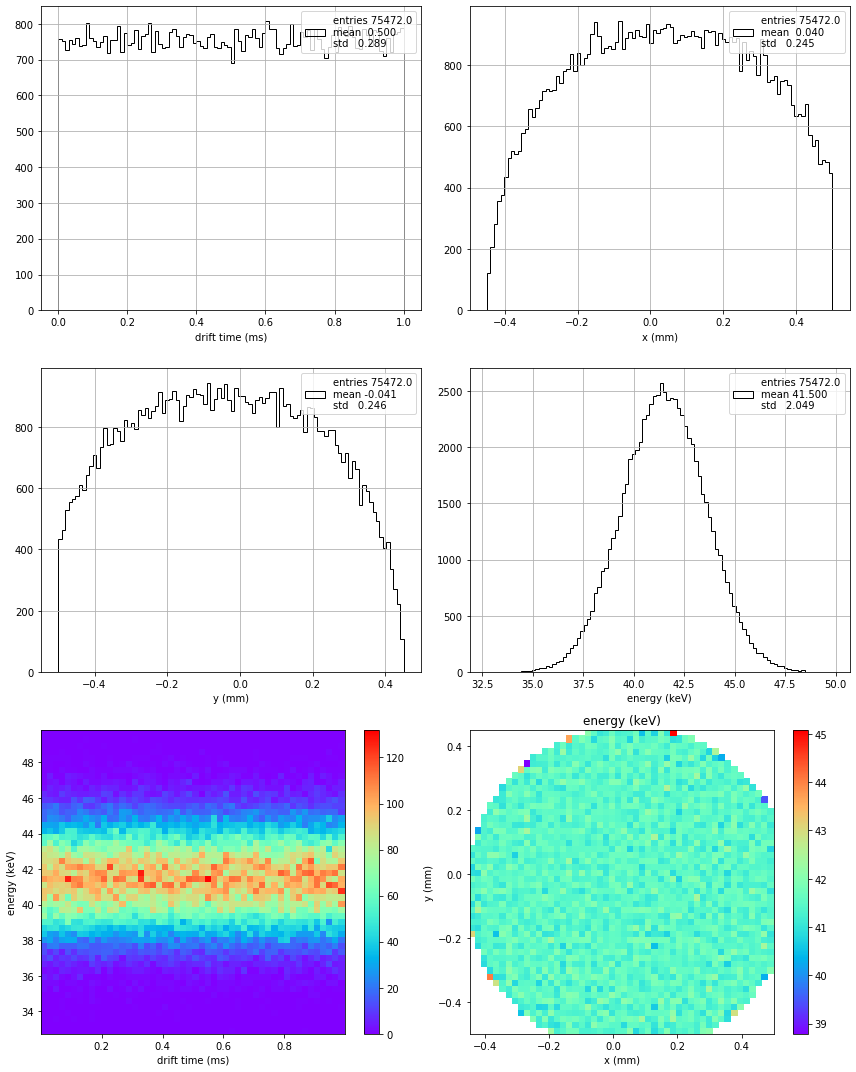

In [13]:
xdf = pd.DataFrame(df) 
xdf['energy'] = corenergy
xsel = ut.in_range(corenergy, (30, 50))
krana.plot_data(xdf[xsel], 50)

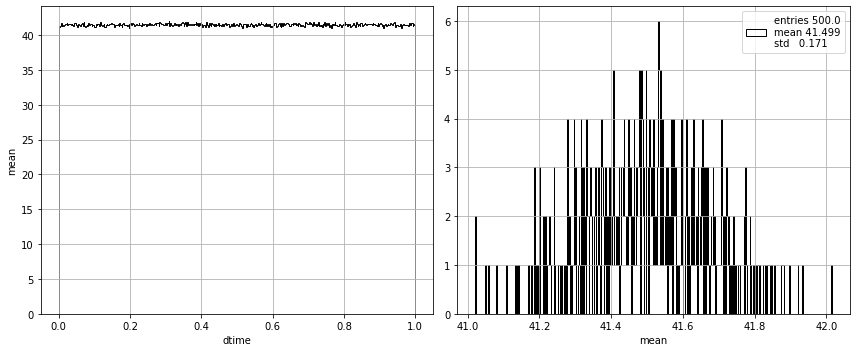

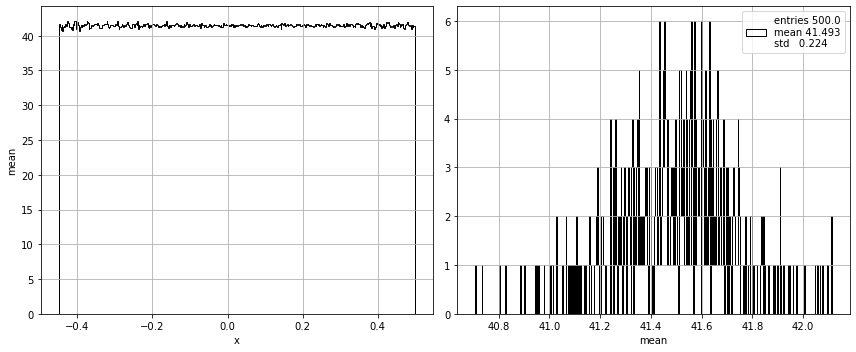

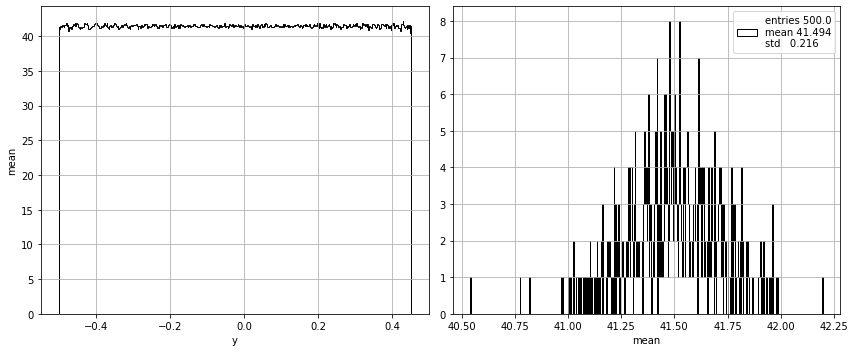

In [14]:
krana.plot_xydt_energy_profiles(xdf[xsel], nbins = 500)